<a href="https://colab.research.google.com/github/liviaalmada/ml2023/blob/master/regressao_linear/sgd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Wine-Regression/winequality-white .csv", sep=';')

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>]], dtype=object)

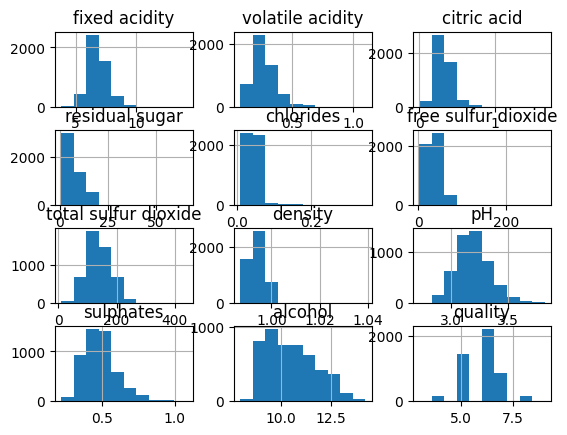

In [ ]:
df.hist()

In [ ]:
df.cov()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,0.712114,-0.001931,0.029533,0.381022,0.000426,-0.708919,3.266013,0.000670,-0.054265,-0.001651,-0.125533,-0.084947
volatile acidity,-0.001931,0.010160,-0.001823,0.032865,0.000155,-0.166300,0.382354,0.000008,-0.000486,-0.000411,0.008400,-0.017382
citric acid,0.029533,-0.001823,0.014646,0.057829,0.000302,0.193630,0.622989,0.000054,-0.002992,0.000861,-0.011278,-0.000987
residual sugar,0.381022,0.032865,0.057829,25.725770,0.009828,25.800578,86.531303,0.012727,-0.148684,-0.015435,-2.812740,-0.438316
chlorides,0.000426,0.000155,0.000302,0.009828,0.000477,0.037674,0.184687,0.000017,-0.000298,0.000042,-0.009684,-0.004062
free sulfur dioxide,-0.708919,-0.166300,0.193630,25.800578,0.037674,289.242720,444.865891,0.014966,-0.001587,0.114938,-5.234509,0.122878
total sulfur dioxide,3.266013,0.382354,0.622989,86.531303,0.184687,444.865891,1806.085491,0.067352,0.014894,0.652645,-23.476605,-6.576746
density,0.000670,0.000008,0.000054,0.012727,0.000017,0.014966,0.067352,0.000009,-0.000042,0.000025,-0.002871,-0.000814
pH,-0.054265,-0.000486,-0.002992,-0.148684,-0.000298,-0.001587,0.014894,-0.000042,0.022801,0.002688,0.022565,0.013297
sulphates,-0.001651,-0.000411,0.000861,-0.015435,0.000042,0.114938,0.652645,0.000025,0.002688,0.013025,-0.002448,0.005425


<Axes: xlabel='alcohol', ylabel='pH'>

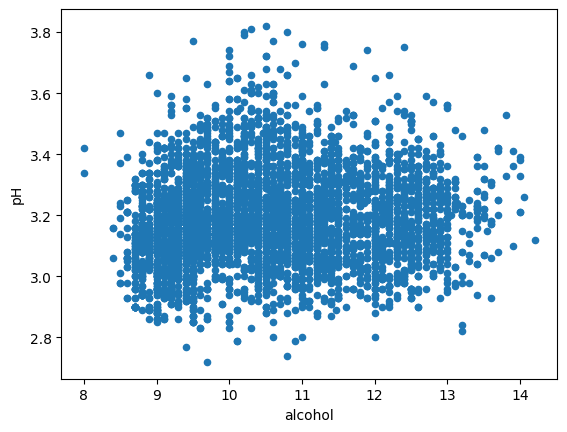

In [ ]:
df.plot.scatter(x='alcohol', y='pH')

<Axes: xlabel='fixed acidity', ylabel='volatile acidity'>

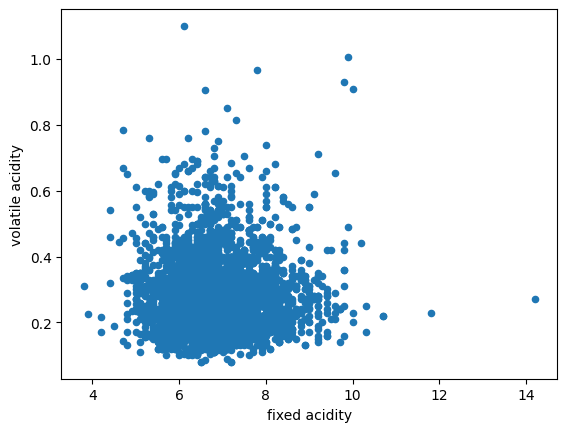

In [ ]:
df.plot.scatter(x='fixed acidity', y='volatile acidity')

<Axes: xlabel='fixed acidity', ylabel='pH'>

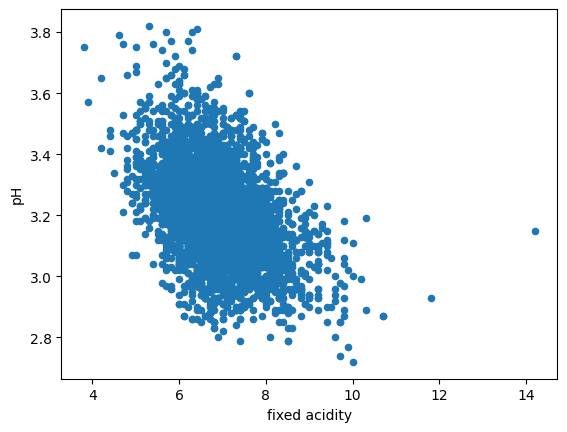

In [ ]:
df.plot.scatter(x='fixed acidity', y='pHb')

In [ ]:
from sklearn.model_selection import  train_test_split

In [ ]:
Y = df[['quality']].values

In [ ]:
X = df.values[:,:-1]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.20, random_state=42)

In [ ]:
from sklearn.linear_model import SGDRegressor 

In [ ]:
sgd = SGDRegressor(early_stopping=False)

In [ ]:
y_train = y_train.reshape(y_train.shape[0],)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
X_train_ = scaler.fit_transform(X_train)

In [ ]:
sgd.fit(X_train_,y_train)

SGDRegressor()

In [ ]:
sgd.n_iter_

26

In [ ]:
sgd.n_iter_no_change

5

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error 

In [ ]:
y_test = y_test.reshape(y_test.shape[0],)

In [ ]:
X_test_ = scaler.transform(X_test)

In [ ]:
mean_absolute_error(sgd.predict(X_test_),y_test)

0.6105032180714282

In [ ]:
mean_squared_error(sgd.predict(X_test_),y_test)

0.6232171470986622